In [57]:
!pip install mido pandas matplotlib

import mido
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Load metadata
df = pd.read_csv("maestro-v3.0.0/maestro-v3.0.0.csv")

# New metadata column for absolute file paths, ChatGPT
df["midi_path"] = df["midi_filename"].apply(
    lambda p: Path("maestro-v3.0.0") / p
)

# Split data. Validate possibly unnecessary
df_train = df[df["split"] == "train"] # 962 elements
df_validate = df[df["split"] == "validation"] # 137 elements
df_test  = df[df["split"] == "test"] # 177 elements

In [58]:
def extract_sustain_curve(midi):
    curve = []
    time_s = 0

    for msg in midi:
        time_s += msg.time
        # control=64 indicates sustain pedal
        if msg.type == "control_change" and msg.control == 64:
            # Append current time and pedal value
            curve.append((time_s, msg.value))
    return curve

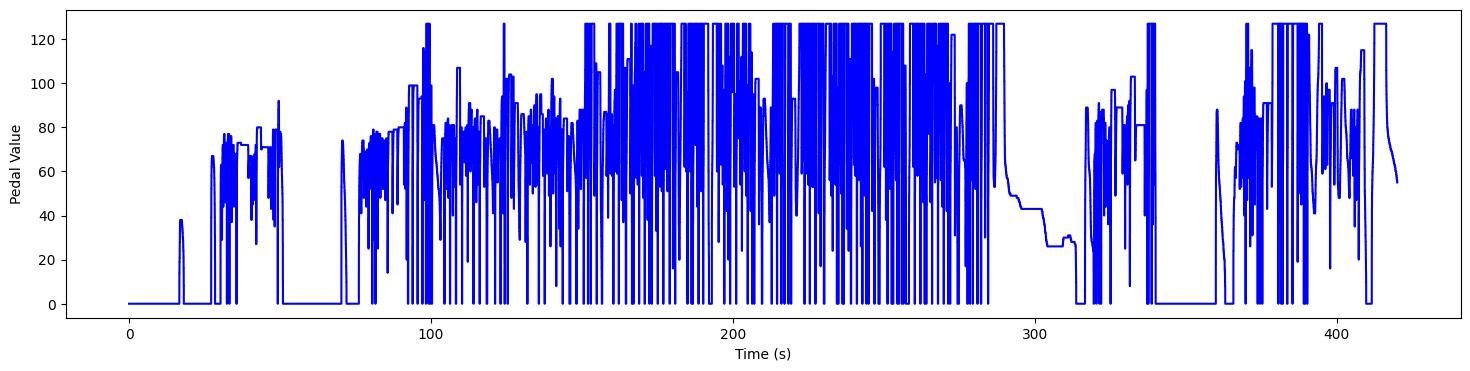

In [59]:
# An arbitrary sample
paysage = mido.MidiFile(df_test.iloc[58]["midi_path"])

# Extract sustain pedal data
pedal_curve = extract_sustain_curve(paysage)

# Convert to seconds and separate values
times, values = zip(*pedal_curve) if pedal_curve else ([], [])

# Plot
plt.figure(figsize=(18, 4))
# steps-post keeps level flat when there are no messages
plt.plot(times, values, drawstyle='steps-post', color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Pedal Value")
plt.show()